# Question 2
Random forests for image approximation

## (a)
Download and load mona lisa

In [1]:
import cv2
from imageio import imread as imread2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
from IPython.display import clear_output
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
# Load the image
mona_pic = np.array(imread2("mona_lisa.jpg"))
mona_pic.shape

(900, 604, 3)

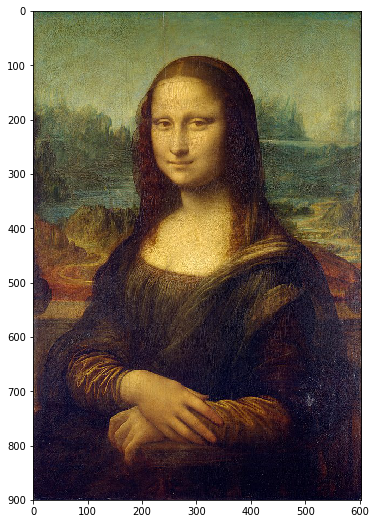

In [3]:
_ = plt.figure(figsize = (6, 9))
_ = plt.imshow(mona_pic)

## (b)

Preprocessing the input

### Uniformly randomly sample 5000 locations

In [4]:
np.random.seed(5)
sampled_location = []
# To look at distribution of the samples
sampled_mona_plot = np.zeros(mona_pic.shape, dtype = int)
# Randomly sample 5000 data point
for i in range(5000):
    first_ind = np.random.randint(mona_pic.shape[0], size = 1)[0]
    second_ind = np.random.randint(mona_pic.shape[1], size = 1)[0]
    sampled_mona_plot[first_ind, second_ind] = [255, 255, 255]
    sampled_location.append([first_ind, second_ind])
sampled_location = np.array(sampled_location)

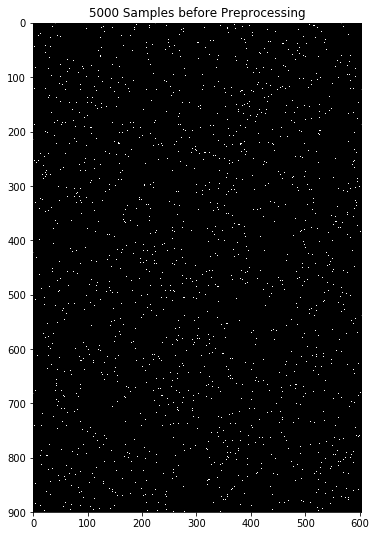

In [5]:
_ = plt.figure(figsize = (6, 9))
_ = plt.imshow(sampled_mona_plot)
_ = plt.title("5000 Samples before Preprocessing")

### Unit-normalization would be the best choice of preprocessing in this case. Because it would normalize and make the difference of feature between each data point smaller and easier for random forest to train and predict. Not choosing mean subtraction because it would create some negative values in the coordinates which does not make a lot of sense in this case, and not choosing standardization because it would make the datapoints less spread out and would not be able to cover a lot of grounds. It is the opposite of what we want when we are sampling our data.

In [6]:
# Use the same normalizer to normalize the training data and testing data later on
normalizer = Normalizer()
normalizer.fit(sampled_location)
train_data = normalizer.transform(sampled_location)

## (c)
Preprocessing the output

Learn a different function for each channel 

Divide each pixel value by 255 to make sure all lie between 0.0 and 1.0. Because we want all the red, blue, and green values of the image to reproduce the original image. We divided the pixel value so the random forest regressor could better learn the data without huge variances.


In [7]:
# Have one label for each color for the whole training set
train_r = []
train_g = []
train_b = []
for coor in sampled_location:
    # rescale the pixel intensities to lie between 0.0 and 1.0 by dividing each data point by 255
    train_r.append(mona_pic[coor[0], coor[1]][0]/255)
    train_g.append(mona_pic[coor[0], coor[1]][1]/255)
    train_b.append(mona_pic[coor[0], coor[1]][2]/255)

## (d)
Train 3 random forest model, and use to predict color for each pixel
I am just using a random forest classifier with hyperparam I made up because that is what I think that would make sense from my understandings of random forest classifier

In [8]:
def predict_mona(mona_pic, num_trees, n_depth):
    # Create 3 random forest classifier
    rf_r = RandomForestRegressor(n_estimators = num_trees, max_depth = n_depth, criterion = "mse", n_jobs = -1, random_state = 5)
    rf_g = RandomForestRegressor(n_estimators = num_trees, max_depth = n_depth, criterion = "mse", n_jobs = -1, random_state = 5)
    rf_b = RandomForestRegressor(n_estimators = num_trees, max_depth = n_depth, criterion = "mse", n_jobs = -1, random_state = 5)

    rf_r.fit(sampled_location, train_r)
    clear_output()
    print("Model fit 1 Complete")
    rf_g.fit(sampled_location, train_g)
    clear_output()
    print("Model fit 2 Complete")
    rf_b.fit(sampled_location, train_b)
    clear_output()
    print("Model fit 3 Complete")
    
    # The new image
    rf_d_mona = np.zeros(mona_pic.shape, dtype = int)
    # All the indexes for prediction with random forest regression
    all_index = np.mgrid[0:mona_pic.shape[0], 0:mona_pic.shape[1]].reshape(2,-1).T
    # Store all the color brightness for each color with this model
    all_red = rf_r.predict(all_index)
    clear_output()
    print("Model predict 1 Complete")
    all_green = rf_g.predict(all_index)
    clear_output()
    print("Model predict 2 Complete")
    all_blue = rf_b.predict(all_index)
    clear_output()
    print("Model predict 3 Complete")
    all_red = all_red.reshape(mona_pic.shape[0], mona_pic.shape[1])
    all_green = all_green.reshape(mona_pic.shape[0], mona_pic.shape[1])
    all_blue = all_blue.reshape(mona_pic.shape[0], mona_pic.shape[1])

    # Change back the output to 255
    all_red = all_red * 255
    all_green = all_green * 255
    all_blue = all_blue * 255    
    
    # Put all the colors into each pixel of the new image
    for i in range(mona_pic.shape[0]):
        for j in range(mona_pic.shape[1]):
            rf_d_mona[i, j] = [all_red[i, j], all_green[i, j], all_blue[i, j]]
        clear_output()
        print("Creating image", np.ceil(i/mona_pic.shape[0] *100), "% Complete")
        
    clear_output()
    print("All Complete")
    return rf_d_mona

In [9]:
# No source, I just made the hyperparams up. A lot of trees and a lot of depth for a good prediction image
rf_d_mona = predict_mona(mona_pic, 300, 20)

All Complete


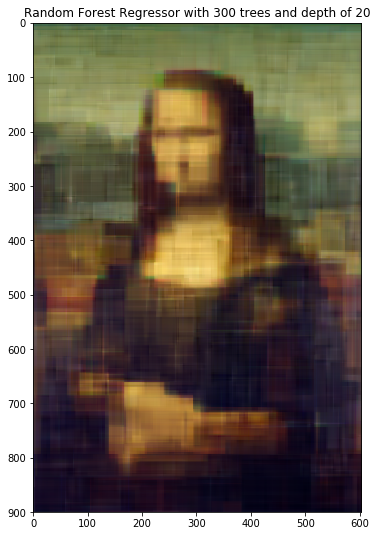

In [10]:
_ = plt.figure(figsize = (6, 9))
_ = plt.imshow(rf_d_mona)
_ = plt.title("Random Forest Regressor with 300 trees and depth of 20")

## (e)
Experimentation
### (i)
Random forest with single decision tree with depths 1, 2, 3, 5, 10, and 15

In [11]:
depth_1_mona = predict_mona(mona_pic, 1, 1)
depth_2_mona = predict_mona(mona_pic, 1, 2)
depth_3_mona = predict_mona(mona_pic, 1, 3)
depth_5_mona = predict_mona(mona_pic, 1, 5)
depth_10_mona = predict_mona(mona_pic, 1, 10)
depth_15_mona = predict_mona(mona_pic, 1, 15)

All Complete


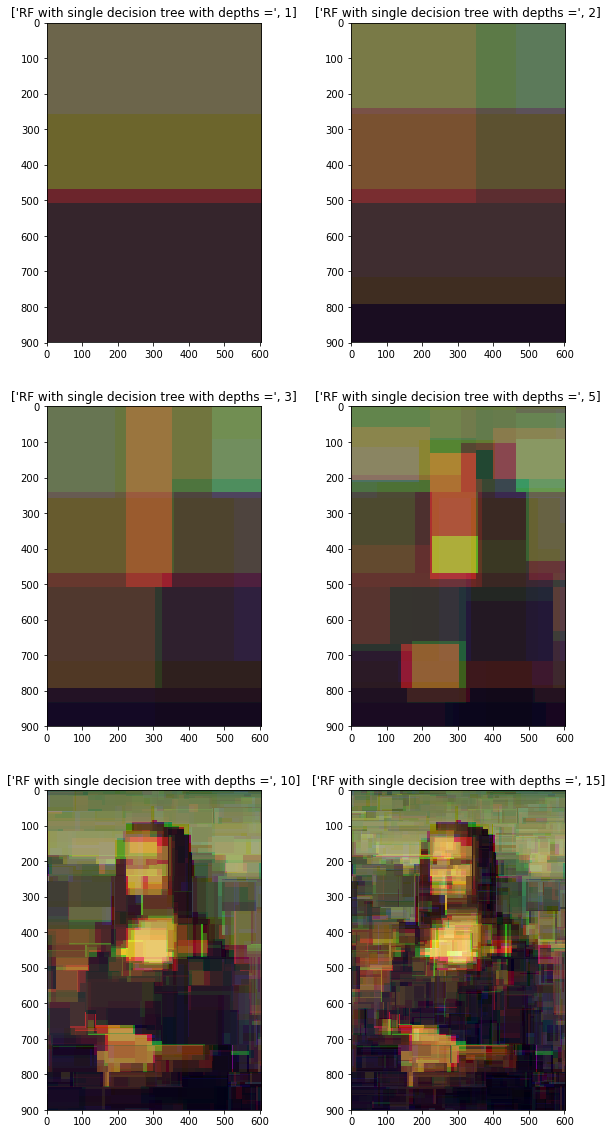

In [12]:
depth_mona = {0: depth_1_mona, 1: depth_2_mona, 2: depth_3_mona, 3: depth_5_mona, 4: depth_10_mona, 5: depth_15_mona}
depth_dict = {0: 1, 1: 2, 2: 3, 3: 5, 4: 10, 5: 15}
depth_fig = plt.figure(figsize=(10, 20))
for k in range(6):
    ax = depth_fig.add_subplot(3, 2, k + 1)
    _ = plt.imshow(depth_mona[k])
    _ = ax.title.set_text(["RF with single decision tree with depths =", depth_dict[k]])

### As seen from the results above, the more depth to the model with the same amount of decision trees (1), the more "detail" the predicted image has. With more depth, there are more and thinner "stripes" to give more accurate prediction of the pixels. More regions or blocks to capture more information of the image, to make better predictions and make the image distinguishable.

### (ii)
Random forest with with depths 7 and number of trees equal to 1, 3, 5, 10, and 100

In [13]:
tree_1_mona = predict_mona(mona_pic, 1, 7)
tree_3_mona = predict_mona(mona_pic, 3, 7)
tree_5_mona = predict_mona(mona_pic, 5, 7)
tree_10_mona = predict_mona(mona_pic, 10, 7)
tree_100_mona = predict_mona(mona_pic, 100, 7)

All Complete


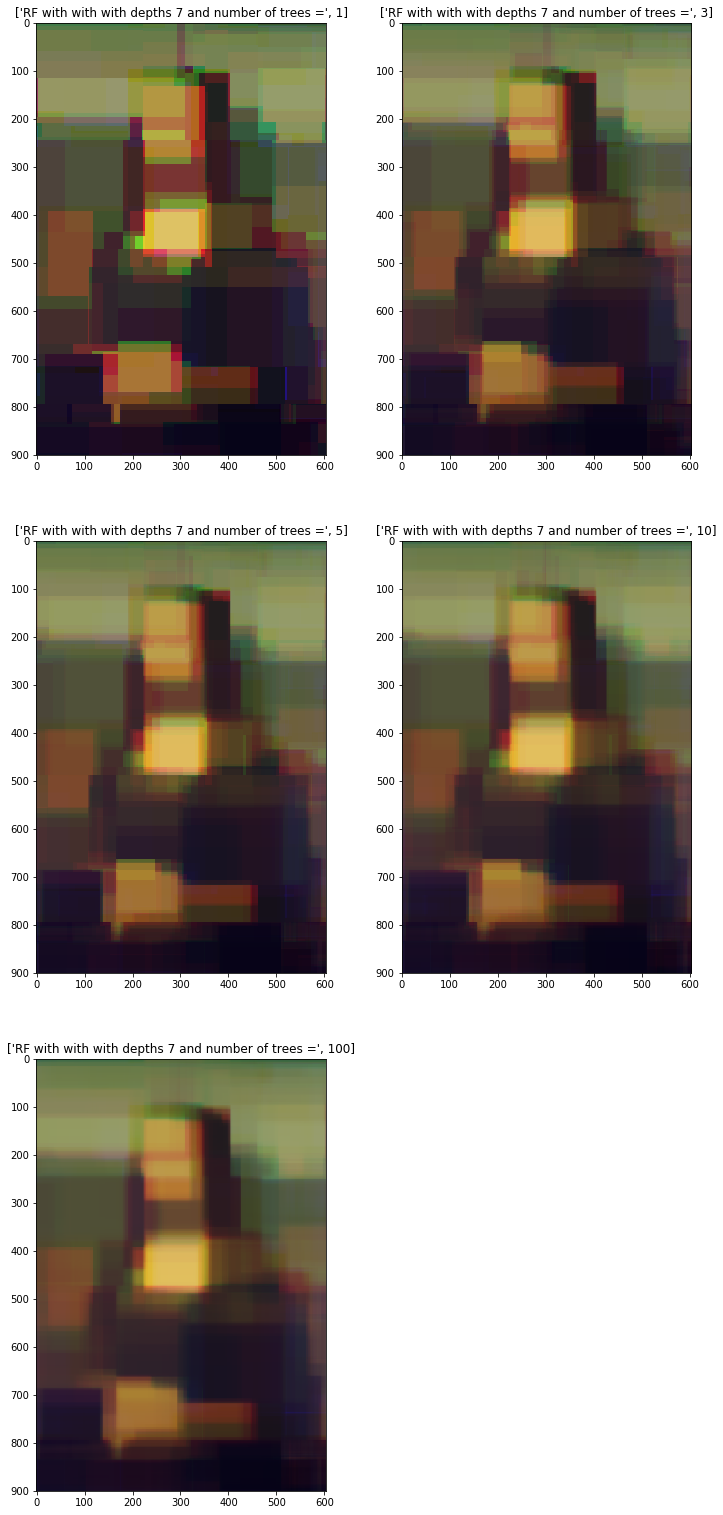

In [14]:
tree_mona = {0: tree_1_mona, 1: tree_3_mona, 2: tree_5_mona, 3: tree_10_mona, 4: tree_100_mona}
tree_dict = {0: 1, 1: 3, 2: 5, 3: 10, 4: 100}
tree_fig = plt.figure(figsize=(12,27))
for k in range(5):
    ax = tree_fig.add_subplot(3, 2, k + 1)
    _ = plt.imshow(tree_mona[k])
    _ = ax.title.set_text(["RF with with with depths 7 and number of trees =", tree_dict[k]])

### As seen from the results above, the more decision trees to the model with the same depth (7), the more "smooth" the predicted image is. With more tree, there are more estimators to make the predictions less intense and more smooth for each pixels. More trees help better learn the image and to make better and prediction image more smooth.

### (iii)
Simple baseline, repeat the experiment using a k-NNregressor, for k = 1

In [15]:
# Three knn for each color
knn_r = KNeighborsRegressor(n_neighbors = 1, n_jobs = -1)
knn_r.fit(sampled_location, train_r)
knn_g = KNeighborsRegressor(n_neighbors = 1, n_jobs = -1)
knn_g.fit(sampled_location, train_g)
knn_b = KNeighborsRegressor(n_neighbors = 1, n_jobs = -1)
knn_b.fit(sampled_location, train_b)

# The new image
knn_mona = np.zeros(mona_pic.shape, dtype = int)
# All the indexes for prediction with random forest regression
all_index = np.mgrid[0:mona_pic.shape[0], 0:mona_pic.shape[1]].reshape(2,-1).T
# Store all the color brightness for each color with this model
knn_red = knn_r.predict(all_index)
clear_output()
print("Model predict 1 Complete")
knn_green = knn_g.predict(all_index)
clear_output()
print("Model predict 2 Complete")
knn_blue = knn_b.predict(all_index)
clear_output()
print("Model predict 3 Complete")
knn_red = knn_red.reshape(mona_pic.shape[0], mona_pic.shape[1])
knn_green = knn_green.reshape(mona_pic.shape[0], mona_pic.shape[1])
knn_blue = knn_blue.reshape(mona_pic.shape[0], mona_pic.shape[1])

# Change back the output to 255
knn_red = knn_red * 255
knn_green = knn_green * 255
knn_blue = knn_blue * 255    
    
# Put all the colors into each pixel of the new image
for i in range(mona_pic.shape[0]):
    for j in range(mona_pic.shape[1]):
        knn_mona[i, j] = [knn_red[i, j], knn_green[i, j], knn_blue[i, j]]
    clear_output()
    print("Creating image", np.ceil(i/mona_pic.shape[0] *100), "% Complete")

Creating image 100.0 % Complete


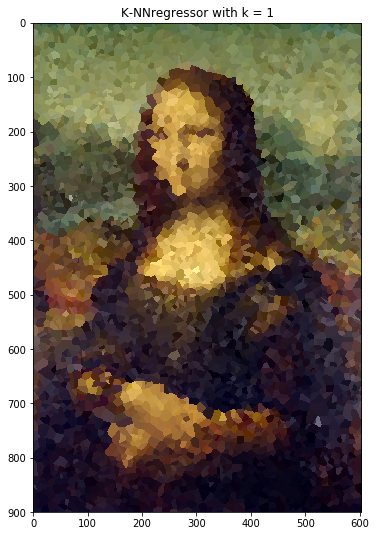

In [16]:
_ = plt.figure(figsize = (6, 9))
_ = plt.imshow(knn_mona)
_ = plt.title("K-NNregressor with k = 1")

### The result looks like the same image but with "larger pixels", lower pixels for the image. Because the pixels close together are made into the same color, so that they look like large pixels. There is no model or rules to determine what the pixels would look like base of the coordinates except just looking the same as the closest pixel in the training set. There are 5000 data point in the training sets so there are exactly 5000 "pixels" just different in size of the image. Lowering from the original image of 543600 pixels, which significantly lowered the quality of the image.

### (iv)
Experiment with different pruning strategies of your choice

Gonna run a grid search to see what would make the best hyperparameter for random forest regressor with no constraint on time consumption.

We adjust number of trees, max depth, and max leaf per node to prevent overfitting

In [32]:
# For the color red in pixels
red_param_grid = [
    # Trying 8 (2x2x2) combinations of hyperparameters
    {'n_estimators': [500, 700],
     'max_depth': [5, 10],
     'max_leaf_nodes': [16, 32]}
]

red_rf = RandomForestRegressor(criterion = "mse", n_jobs = -1, random_state = 5)

# train across 5 folds
grid_search_red = GridSearchCV(red_rf, red_param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                           return_train_score = True, n_jobs = -1)
grid_search_red.fit(sampled_location, train_r)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=5, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [500, 700], 'max_depth': [5, 10], 'max_leaf_nodes': [16, 32]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
grid_search_red.best_params_

{'max_depth': 10, 'max_leaf_nodes': 32, 'n_estimators': 700}

In [34]:
# For the color red in pixels
green_param_grid = [
    # Trying 8 (2x2x2) combinations of hyperparameters
    {'n_estimators': [500, 700],
     'max_depth': [5, 10],
     'max_leaf_nodes': [16, 32]}
]

green_rf = RandomForestRegressor(criterion = "mse", n_jobs = -1, random_state = 5)

# train across 5 folds
grid_search_green = GridSearchCV(green_rf, green_param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                           return_train_score = True, n_jobs = -1)
grid_search_green.fit(sampled_location, train_g)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=5, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [500, 700], 'max_depth': [5, 10], 'max_leaf_nodes': [16, 32]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [35]:
grid_search_green.best_params_

{'max_depth': 10, 'max_leaf_nodes': 32, 'n_estimators': 500}

In [36]:
# For the color red in pixels
blue_param_grid = [
    # Trying 8 (2x2x2) combinations of hyperparameters
    {'n_estimators': [500, 700],
     'max_depth': [5, 10],
     'max_leaf_nodes': [16, 32]}
]

blue_rf = RandomForestRegressor(criterion = "mse", n_jobs = -1, random_state = 5)

# train across 5 folds
grid_search_blue = GridSearchCV(blue_rf, blue_param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                           return_train_score = True, n_jobs = -1)
grid_search_blue.fit(sampled_location, train_b)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=5, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [500, 700], 'max_depth': [5, 10], 'max_leaf_nodes': [16, 32]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [37]:
grid_search_blue.best_params_

{'max_depth': 10, 'max_leaf_nodes': 32, 'n_estimators': 700}

### Now with this random forest regressor we predict the image

In [38]:
# The new image
prun_mona = np.zeros(mona_pic.shape, dtype = int)
# All the indexes for prediction with random forest regression
all_index = np.mgrid[0:mona_pic.shape[0], 0:mona_pic.shape[1]].reshape(2,-1).T
# Store all the color brightness for each color with this model
prun_red = grid_search_red.best_estimator_.predict(all_index)
clear_output()
print("Model predict 1 Complete")
prun_green = grid_search_green.best_estimator_.predict(all_index)
clear_output()
print("Model predict 2 Complete")
prun_blue = grid_search_blue.best_estimator_.predict(all_index)
clear_output()
print("Model predict 3 Complete")
prun_red = prun_red.reshape(mona_pic.shape[0], mona_pic.shape[1])
prun_green = prun_green.reshape(mona_pic.shape[0], mona_pic.shape[1])
prun_blue = prun_blue.reshape(mona_pic.shape[0], mona_pic.shape[1])

# Change back the output to 255
prun_red = prun_red * 255
prun_green = prun_green * 255
prun_blue = prun_blue * 255    
    
# Put all the colors into each pixel of the new image
for i in range(mona_pic.shape[0]):
    for j in range(mona_pic.shape[1]):
        prun_mona[i, j] = [prun_red[i, j], prun_green[i, j], prun_blue[i, j]]
    clear_output()
    print("Creating image", np.ceil(i/mona_pic.shape[0] *100), "% Complete")

Creating image 100.0 % Complete


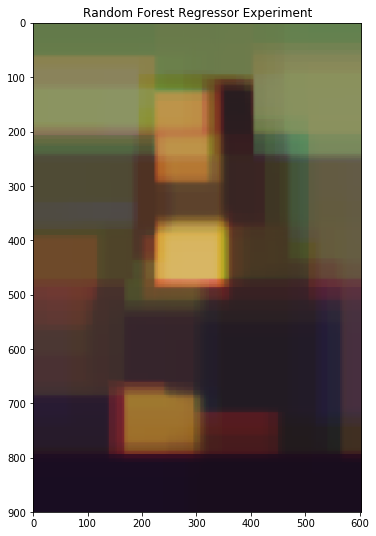

In [39]:
_ = plt.figure(figsize = (6, 9))
_ = plt.imshow(prun_mona)
_ = plt.title("Random Forest Regressor Experiment")

## (f)
Analysis

### (i)
We take the depth = 3 with 1 decision tree model and take a look at the tree visually

In [40]:
rf_red_5 = DecisionTreeRegressor(max_depth = 3, criterion = "mse", random_state = 5)
rf_red_5.fit(sampled_location, train_r)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=5, splitter='best')

In [41]:
# To visualize the tree
decision_tree_data = export_graphviz(rf_red_5, out_file = None)

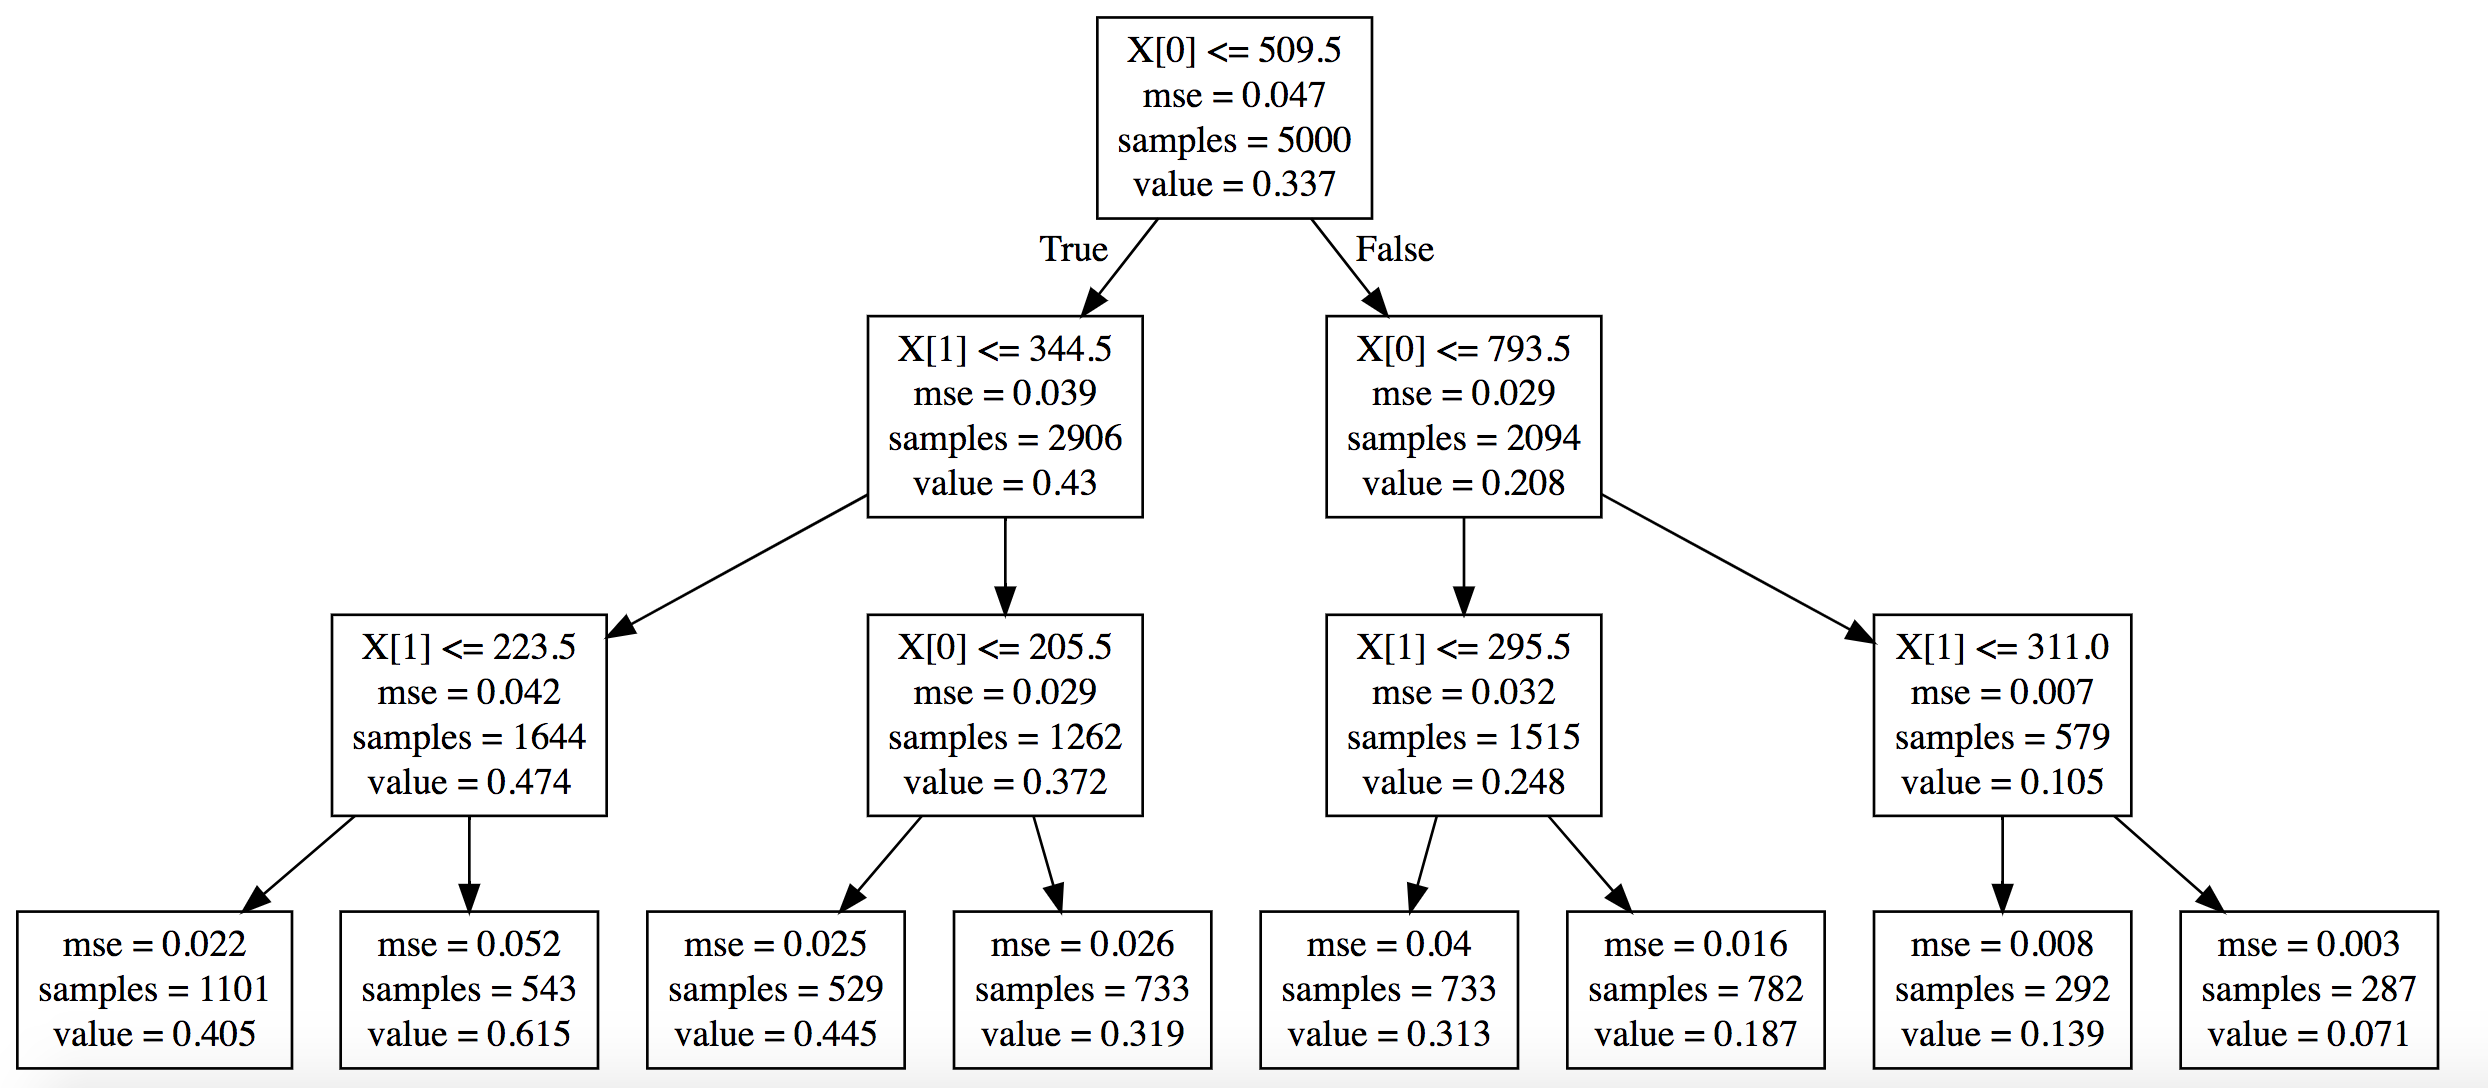

In [42]:
# Plotting it using http://webgraphviz.com/
Image("1fi.png")

### Decision rule at each split point for this tree at root is:
if x[0] <= 509.5, go to the left child, else go to right child

So if the first coordinate of the datapoint is to the left of 510, then split these points to the left child tree

A total of 2906 of the training point went to the left child and 2094 to the right

MSE decrease from 0.047 to 0.039 to the left child, and 0.029 to the right child

### (ii)
Why does the resulting image look like the way it does? What shape are the patches of
color, and how are they arranged?

The resulting image looks like a bunch of building blocks because each tree would split with just either x[0] or x[1]. Therefore, the patches of colors can only be rectangle shaped, because the decision trees would alway move horizontally or vertically and never diagonally in this case. So by following the decision rules at each split, points under the same rectangle shape area are the same color.

### (iii)
How many patches of color may be in the resulting image if the forest contains a single decision tree?

As seen from the decision tree I printed for the question above:

Let d be depth of the tree:

Number of patches = $2^d$

### (iv)
Because it is a voting system for random forest regressor with each of the n decision trees training on different mini sets of the training data, if there are no two trees voting for the same exact value, there would be a possible total of leafs of patches. However, there cannot be more color patches than the number of unique color in the original image. So, the number of patches that may be in resulting image is:

Max($n * 2^d$, total number of unique color in original image)